<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>DEAV Code</h1>
</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Exporting and cleaning data </h1>
</center>

In [2]:
df = pd.read_csv('StudentInfo.csv',low_memory=False)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
print("Shape of the datset : " , df.shape)
print("Size of the datset : " , df.size)
print("Dimension of the datset : " , df.ndim)
print("Length of the datset : " , len(df))

Shape of the datset :  (1044, 33)
Size of the datset :  34452
Dimension of the datset :  2
Length of the datset :  1044


In [4]:
(df.isnull().sum()/df.shape[0])*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Categorical Data Encoding</h1>
</center>

In [75]:
# Label Encoding for ordinal columns
le = LabelEncoder()
label = ['famrel' ,'freetime' , 'goout' , 'Dalc' , 'Walc' , 'health']

for lab in label:
    df[lab] = le.fit_transform(df[lab])
    
df.head()    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,2,3,0,0,2,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,4,2,2,0,0,2,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,1,1,2,2,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,0,0,4,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,0,1,4,4,6,10,10


In [76]:
# One-Hot Encoding for Categorical columns 
OHE=OneHotEncoder(handle_unknown='ignore', sparse=False)
cols = ['school', 'schoolsup', 'address', 'Pstatus', 'famsize', 'sex', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'Mjob', 'Fjob', 'reason', 'guardian']

df_OHE = pd.DataFrame(OHE.fit_transform(df[cols])).astype('int64')
df_OHE.columns = OHE.get_feature_names_out(cols)
df_OHE.index = df.index

df_OHE.head()

/Users/divya/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,school_GP,school_LVA,school_MS,school_SLA,schoolsup_no,schoolsup_yes,address_R,address_U,Pstatus_A,Pstatus_T,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,0,0,0,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [77]:
df_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   school_GP          1044 non-null   int64
 1   school_LVA         1044 non-null   int64
 2   school_MS          1044 non-null   int64
 3   school_SLA         1044 non-null   int64
 4   schoolsup_no       1044 non-null   int64
 5   schoolsup_yes      1044 non-null   int64
 6   address_R          1044 non-null   int64
 7   address_U          1044 non-null   int64
 8   Pstatus_A          1044 non-null   int64
 9   Pstatus_T          1044 non-null   int64
 10  famsize_GT3        1044 non-null   int64
 11  famsize_LE3        1044 non-null   int64
 12  sex_F              1044 non-null   int64
 13  sex_M              1044 non-null   int64
 14  famsup_no          1044 non-null   int64
 15  famsup_yes         1044 non-null   int64
 16  paid_no            1044 non-null   int64
 17  paid_yes      

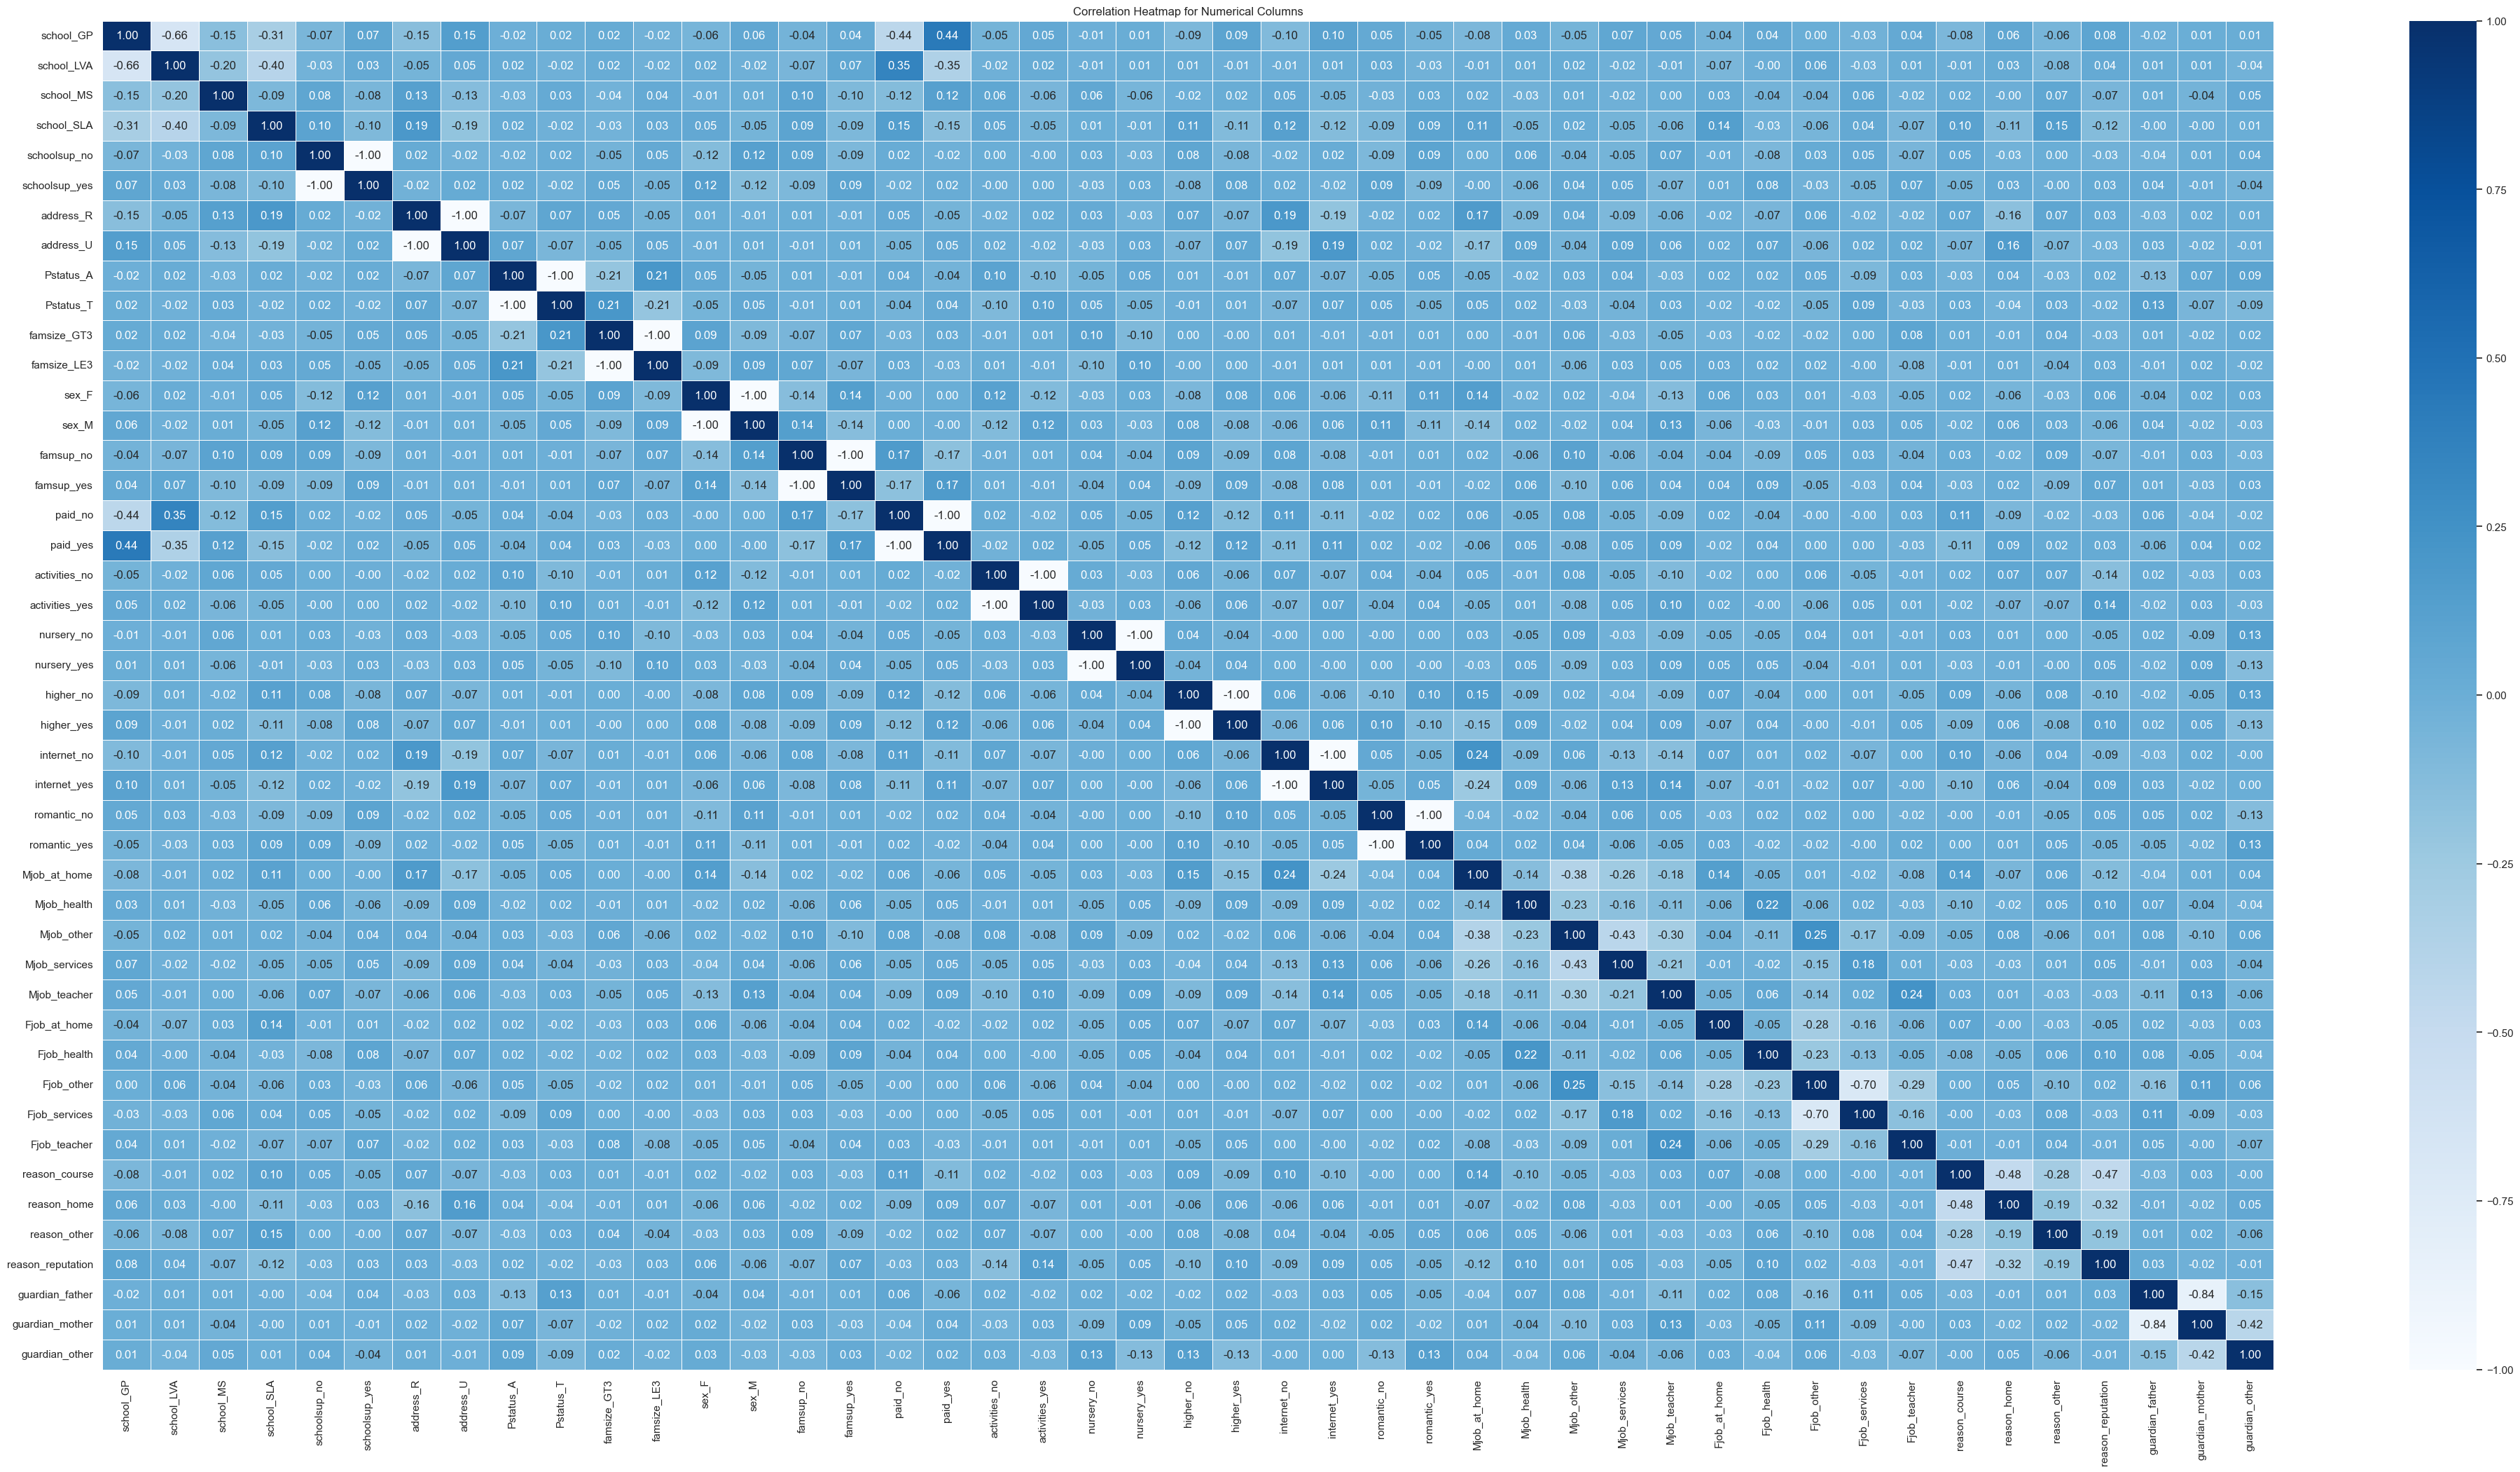

In [115]:
# Select only numerical columns
numerical_columns = df_OHE.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df_OHE[numerical_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(50, 25))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap for Numerical Columns')
plt.show()

In [79]:
#concatinating the encoded and original dataset
df = pd.concat([df,df_OHE],axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,0,0,0,1,0,0,1,0,0


In [80]:
df.drop(columns=cols,inplace=True)
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,3,2,3,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,4,2,2,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,3,2,1,1,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,2,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,3,2,1,0,...,1,0,0,0,1,0,0,1,0,0


In [81]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_LVA', 'school_MS', 'school_SLA',
       'schoolsup_no', 'schoolsup_yes', 'address_R', 'address_U', 'Pstatus_A',
       'Pstatus_T', 'famsize_GT3', 'famsize_LE3', 'sex_F', 'sex_M',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [82]:
df.shape

(1044, 61)

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Restyling Of Some Columns</h1>
</center>

In [84]:
def age(x):
    if (x<=18):
        return 0
    elif (18<x):
        return 1
    

In [85]:
df['age'] = df['age'].apply(age)

In [87]:
df['age'].value_counts()

age
0    974
1     70
Name: count, dtype: int64

In [88]:
# As Distribution is almost normal lets divide the categories accordingly -->
def G1(x):
    if (0<=x<=5):
        return 0
    elif (5<x<=10):
        return 1
    elif (10<x<=15):
        return 2
    else:
        return 3

In [89]:
df['G1'] = df['G1'].apply(G1)

In [90]:
def G2(x):
    if (0<=x<=5):
        return 0
    elif (5<x<=10):
        return 1
    elif (10<x<=15):
        return 2
    else:
        return 3

In [91]:
df['G2'] = df['G2'].apply(G2)

In [92]:
def G3(x):
    if (0<=x<=5):
        return 0
    elif (5<x<=10):
        return 1
    elif (10<x<=15):
        return 2
    else:
        return 3

In [93]:
df['G3'] = df['G3'].apply(G3)

In [94]:
le = LabelEncoder()
label = ['age','G1','G2','G3']

for lab in label:
    df[lab] = le.fit_transform(df[lab])
    
df.head() 

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,4,4,2,2,0,3,2,3,0,...,0,0,1,1,0,0,0,0,1,0
1,0,1,1,1,2,0,4,2,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,1,1,1,2,3,3,2,1,1,...,1,0,0,0,0,1,0,0,1,0
3,0,4,2,1,3,0,2,1,1,0,...,0,1,0,0,1,0,0,0,1,0
4,0,3,3,1,2,0,3,2,1,0,...,1,0,0,0,1,0,0,1,0,0


In [95]:
df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_LVA', 'school_MS', 'school_SLA',
       'schoolsup_no', 'schoolsup_yes', 'address_R', 'address_U', 'Pstatus_A',
       'Pstatus_T', 'famsize_GT3', 'famsize_LE3', 'sex_F', 'sex_M',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

In [83]:
df.to_csv('PreprocessedData.csv')

Do all the features available in the dataset really affect the Quality of Education?
What are the predicting variables actually affecting the Quality of Education?

In [135]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('StudentInfo.csv')

# Selecting categorical features (you may need to adjust this based on your dataset)
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Results dictionary to store chi-square test results for each feature
chi_square_results = {}

# Perform Chi-Square test for each categorical feature
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['G3'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_results[feature] = {'chi2_statistic': chi2, 'p_value': p}

# Display the results
for feature, result in chi_square_results.items():
    print(f"Chi-Square Test for {feature}:")
    print(f"Chi2 Statistic: {result['chi2_statistic']}")
    print(f"P-Value: {result['p_value']}")
    print("")

# You can interpret the results and consider features with low p-values as potentially associated with the target variable.


Chi-Square Test for school:
Chi2 Statistic: 171.9588693693143
P-Value: 3.174303524475723e-14

Chi-Square Test for sex:
Chi2 Statistic: 14.242496986973054
P-Value: 0.7131518483806094

Chi-Square Test for address:
Chi2 Statistic: 29.633448722907936
P-Value: 0.04116623611698296

Chi-Square Test for famsize:
Chi2 Statistic: 20.48051526168315
P-Value: 0.3064264131952273

Chi-Square Test for Pstatus:
Chi2 Statistic: 9.521627578943093
P-Value: 0.9464076111825652

Chi-Square Test for Mjob:
Chi2 Statistic: 107.24630521113185
P-Value: 0.004470689911212101

Chi-Square Test for Fjob:
Chi2 Statistic: 84.50328282410699
P-Value: 0.1487254923785042

Chi-Square Test for reason:
Chi2 Statistic: 68.65098328204799
P-Value: 0.0865704948381911

Chi-Square Test for guardian:
Chi2 Statistic: 39.22446540021145
P-Value: 0.32732129829276013

Chi-Square Test for schoolsup:
Chi2 Statistic: 43.697614361969066
P-Value: 0.0006371495502971095

Chi-Square Test for famsup:
Chi2 Statistic: 17.87161374729803
P-Value: 0.46

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming your dataset is named 'df' and the target variable is 'G3'
numerical_features = df.select_dtypes(include='number').columns.tolist()

# Separate features and target
X = df[numerical_features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train a linear regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = linear_reg_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.585855919197847e-30


How does a student’s social life affect the quality of education?

Pearson Correlation Coefficient: -0.0979
P-Value: 0.0015


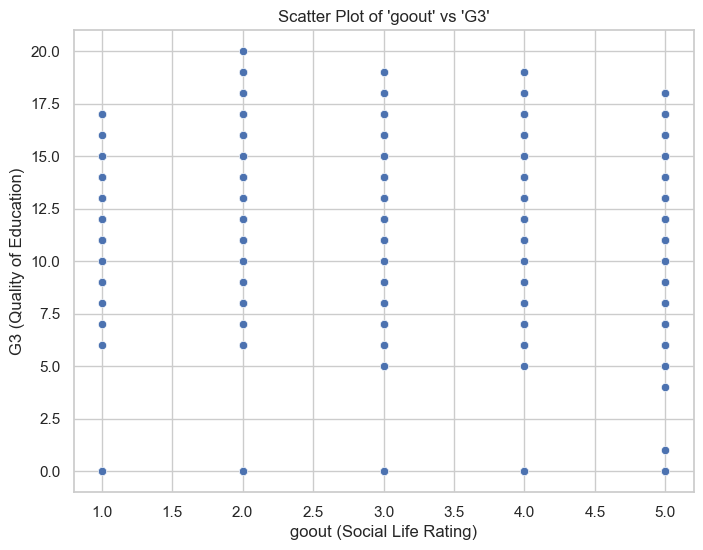

In [137]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is named 'df' and the variables are 'goout' and 'G3'
goout = df['goout']
G3 = df['G3']

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(goout, G3)

# Display the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-Value: {p_value:.4f}")

# Plot a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x=goout, y=G3)
plt.title("Scatter Plot of 'goout' vs 'G3'")
plt.xlabel("goout (Social Life Rating)")
plt.ylabel("G3 (Quality of Education)")
plt.show()


What is the impact of parents’ jobs on the student’s education?

In [138]:
# Chi-squared test for categorical data (e.g., parents' jobs)
contingency_table = pd.crosstab(df['Mjob'], df['G3'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Value: {chi2}, P-Value: {p}")

Chi-Squared Value: 107.24630521113185, P-Value: 0.004470689911212101


In [139]:
# Chi-squared test for categorical data (e.g., parents' jobs)
contingency_table = pd.crosstab(df['Fjob'], df['G3'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared Value: {chi2}, P-Value: {p}")

Chi-Squared Value: 84.50328282410699, P-Value: 0.1487254923785042


Does Quality of education have a positive or negative relationship with
consuming alcohol?

In [140]:
import scipy.stats as stats

# Assuming your dataset is named 'df' and the columns are 'Dalc', 'Walc', and 'G3'

# Calculate the correlation coefficient and p-value for Dalc
corr_dalc, p_value_dalc = stats.pearsonr(df['Dalc'], df['G3'])
print(f"Correlation between Dalc and G3: {corr_dalc:.4f}")
print(f"P-value for Dalc: {p_value_dalc:.4f}")

# Calculate the correlation coefficient and p-value for Walc
corr_walc, p_value_walc = stats.pearsonr(df['Walc'], df['G3'])
print(f"Correlation between Walc and G3: {corr_walc:.4f}")
print(f"P-value for Walc: {p_value_walc:.4f}")


Correlation between Dalc and G3: -0.1296
P-value for Dalc: 0.0000
Correlation between Walc and G3: -0.1157
P-value for Walc: 0.0002


<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Spliting Data</h1>
</center>

In [96]:
target = 'G3'
features = df.columns.to_list()
features.remove('G3')
features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'school_GP',
 'school_LVA',
 'school_MS',
 'school_SLA',
 'schoolsup_no',
 'schoolsup_yes',
 'address_R',
 'address_U',
 'Pstatus_A',
 'Pstatus_T',
 'famsize_GT3',
 'famsize_LE3',
 'sex_F',
 'sex_M',
 'famsup_no',
 'famsup_yes',
 'paid_no',
 'paid_yes',
 'activities_no',
 'activities_yes',
 'nursery_no',
 'nursery_yes',
 'higher_no',
 'higher_yes',
 'internet_no',
 'internet_yes',
 'romantic_no',
 'romantic_yes',
 'Mjob_at_home',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_course',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_father',
 'guardian_mother',
 'guardian_other']

In [97]:
x = df.loc[:,features].values
y = df.loc[:,target].values
y

array([1, 1, 1, ..., 1, 1, 2])

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b> Standrize the Data</h1>
</center>

In [98]:
x_stand = StandardScaler().fit_transform(x)
x_stand

array([[-0.26808316,  1.24207744,  1.46630216, ..., -0.55079106,
         0.6588368 , -0.27419013],
       [-0.26808316, -1.42608891, -1.26243127, ...,  1.81557052,
        -1.51782656, -0.27419013],
       [-0.26808316, -1.42608891, -1.26243127, ..., -0.55079106,
         0.6588368 , -0.27419013],
       ...,
       [-0.26808316, -1.42608891, -1.26243127, ..., -0.55079106,
         0.6588368 , -0.27419013],
       [-0.26808316,  0.35268866, -1.26243127, ..., -0.55079106,
         0.6588368 , -0.27419013],
       [-0.26808316,  0.35268866, -0.35285346, ..., -0.55079106,
         0.6588368 , -0.27419013]])

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b> Infromation Gain</h1>
</center>

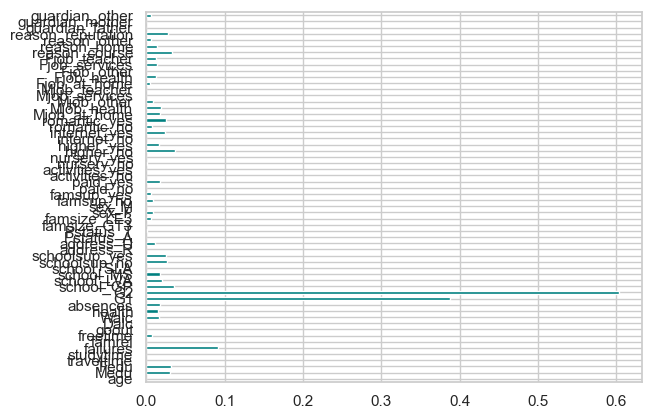

In [99]:
importancies = mutual_info_classif(x,y)
feat_importancies = pd.Series(importancies , features)
feat_importancies.plot(kind = 'barh' , color = 'teal')
plt.show()

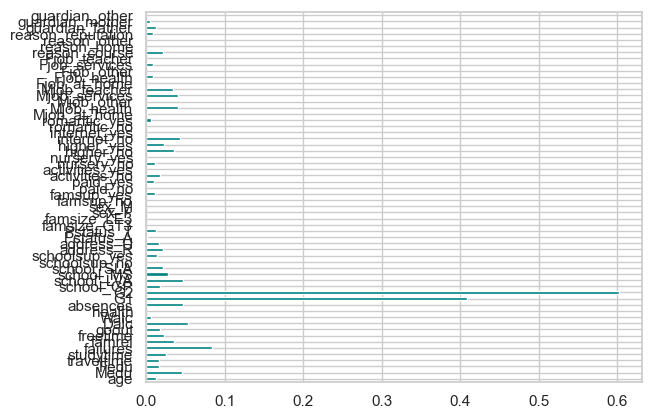

In [100]:
importancies = mutual_info_classif(x_stand,y)
feat_importancies = pd.Series(importancies , features)
feat_importancies.plot(kind = 'barh' , color = 'teal')
plt.show()

In [101]:
feat_importancies.sort_values(ascending=False)

G2                   0.602375
G1                   0.408380
failures             0.083519
Dalc                 0.053474
school_LVA           0.046977
absences             0.046710
Medu                 0.045892
internet_no          0.042723
Mjob_health          0.040200
Mjob_services        0.040192
higher_no            0.035614
famrel               0.034603
Mjob_teacher         0.033654
school_MS            0.027880
studytime            0.024815
freetime             0.022067
higher_yes           0.021890
address_R            0.021585
reason_course        0.021488
school_SLA           0.021113
goout                0.017531
school_GP            0.017278
activities_no        0.017094
Fedu                 0.016373
traveltime           0.015922
address_U            0.015504
schoolsup_yes        0.013230
age                  0.012503
guardian_father      0.012228
Pstatus_T            0.011757
famsup_yes           0.010699
nursery_no           0.010533
paid_yes             0.009202
reason_rep

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b> MI Score</h1>
</center>

In [102]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(x,y)
x_fs = fs.transform(x)
for i in range(len(fs.scores_)):
     print('Feature %s: %f' % (features[i], fs.scores_[i]))

Feature age: 0.000000
Feature Medu: 0.054684
Feature Fedu: 0.014347
Feature traveltime: 0.000000
Feature studytime: 0.021154
Feature failures: 0.105508
Feature famrel: 0.015334
Feature freetime: 0.000000
Feature goout: 0.009994
Feature Dalc: 0.040090
Feature Walc: 0.010699
Feature health: 0.000000
Feature absences: 0.046161
Feature G1: 0.419152
Feature G2: 0.607278
Feature school_GP: 0.041389
Feature school_LVA: 0.040497
Feature school_MS: 0.000000
Feature school_SLA: 0.008493
Feature schoolsup_no: 0.000000
Feature schoolsup_yes: 0.000000
Feature address_R: 0.000000
Feature address_U: 0.006121
Feature Pstatus_A: 0.016511
Feature Pstatus_T: 0.027387
Feature famsize_GT3: 0.000074
Feature famsize_LE3: 0.000000
Feature sex_F: 0.040995
Feature sex_M: 0.000000
Feature famsup_no: 0.000000
Feature famsup_yes: 0.000000
Feature paid_no: 0.000000
Feature paid_yes: 0.000000
Feature activities_no: 0.000000
Feature activities_yes: 0.008866
Feature nursery_no: 0.005696
Feature nursery_yes: 0.000000
F

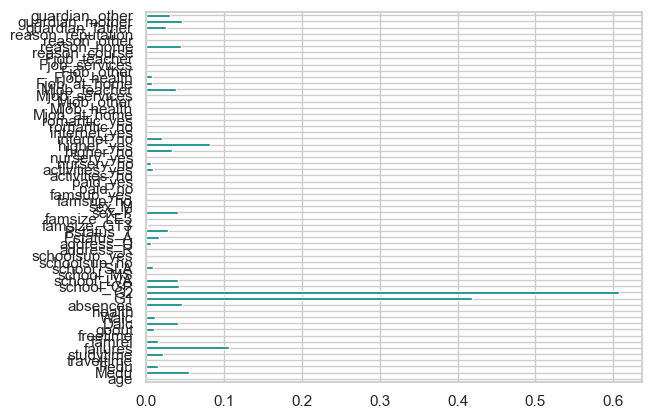

In [103]:
fs_importancies = pd.Series(fs.scores_,features)
fs_importancies.plot(kind = 'barh' , color = 'teal')
plt.show()

In [104]:
fs.fit(x_stand,y)
x_stand_fs = fs.transform(x_stand)
for i in range(len(fs.scores_)):
     print('Feature %s: %f' % (features[i], fs.scores_[i]))

Feature age: 0.000000
Feature Medu: 0.043772
Feature Fedu: 0.006783
Feature traveltime: 0.000000
Feature studytime: 0.020020
Feature failures: 0.080774
Feature famrel: 0.000000
Feature freetime: 0.032833
Feature goout: 0.009858
Feature Dalc: 0.018007
Feature Walc: 0.000000
Feature health: 0.002621
Feature absences: 0.091578
Feature G1: 0.412941
Feature G2: 0.628134
Feature school_GP: 0.000000
Feature school_LVA: 0.066465
Feature school_MS: 0.000000
Feature school_SLA: 0.039946
Feature schoolsup_no: 0.000595
Feature schoolsup_yes: 0.010627
Feature address_R: 0.005705
Feature address_U: 0.016679
Feature Pstatus_A: 0.002526
Feature Pstatus_T: 0.000000
Feature famsize_GT3: 0.000000
Feature famsize_LE3: 0.000000
Feature sex_F: 0.000000
Feature sex_M: 0.000000
Feature famsup_no: 0.000000
Feature famsup_yes: 0.000000
Feature paid_no: 0.000000
Feature paid_yes: 0.006351
Feature activities_no: 0.017267
Feature activities_yes: 0.023735
Feature nursery_no: 0.000000
Feature nursery_yes: 0.000000
F

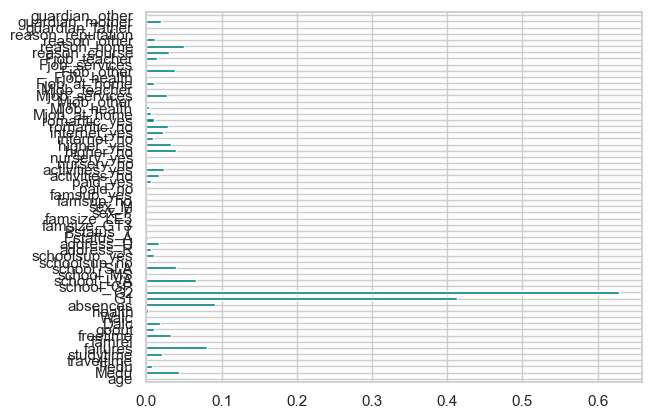

In [105]:
fs_importancies = pd.Series(fs.scores_,features)
fs_importancies.plot(kind = 'barh' , color = 'teal')
plt.show()

<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>PCA</h1>
</center>

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x_stand)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,0.280092,-2.670573,1.023934
1,1.777820,-1.161010,2.495852
2,1.074830,-0.006461,3.494410
3,-3.493440,-0.284370,2.811049
4,-0.703973,-1.251085,3.087894


In [107]:
target_df = df['G3'].reset_index()
target_df.head()

,index,G3
0,0,1
1,1,1
2,2,1
3,3,2
4,4,1


In [108]:
pca_conc = pd.concat([principalDf,target_df], axis = 1)
pca_conc.head()

,principal component 1,principal component 2,principal component 3,index,G3
0,0.280092,-2.670573,1.023934,0,1
1,1.777820,-1.161010,2.495852,1,1
2,1.074830,-0.006461,3.494410,2,1
3,-3.493440,-0.284370,2.811049,3,2
4,-0.703973,-1.251085,3.087894,4,1


In [109]:
pca_conc.corr()

,principal component 1,principal component 2,principal component 3,index,G3
principal component 1,1.000000e+00,5.074681e-17,-4.359225e-17,0.401085,-0.431697
principal component 2,5.074681e-17,1.000000e+00,6.913355e-16,-0.208633,-0.214811
principal component 3,-4.359225e-17,6.913355e-16,1.000000e+00,-0.397496,-0.415278
index,4.010849e-01,-2.086334e-01,-3.974958e-01,1.000000,0.069143
G3,-4.316967e-01,-2.148108e-01,-4.152785e-01,0.069143,1.000000


<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b> LOGISTIC REG</h1>
</center>

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Separate features and target
X = df.drop('G3', axis=1)  # Features
y = df['G3']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_names = ['POOR', 'FAIR', 'GOOD', 'EXCELLENT']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

        POOR       0.35      0.32      0.33        19
        FAIR       0.76      0.76      0.76       102
        GOOD       0.86      0.91      0.88       158
   EXCELLENT       0.93      0.74      0.83        35

    accuracy                           0.81       314
   macro avg       0.73      0.68      0.70       314
weighted avg       0.80      0.81      0.80       314



In [111]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get absolute coefficients and corresponding feature names
coefficients = np.abs(logreg.coef_[0])
feature_coefficients = list(zip(feature_names, coefficients))

# Sort feature coefficients by importance
sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: x[1], reverse=True)

# Display the top 10 features
top_10_features = sorted_feature_coefficients[:10]
for feature, coef in top_10_features:
    print(f"{feature}: {coef:.4f}")


G2: 3.8065
G1: 1.1897
school_LVA: 0.9424
absences: 0.7933
failures: 0.7153
Fedu: 0.6283
freetime: 0.5884
guardian_other: 0.5738
school_GP: 0.5330
goout: 0.5118


In [112]:
list = ['G2', 'G1', 'school_LVA', 'absences', 'failures', 'Fedu', 'freetime', 'guardian_other', 'school_GP', 'goout']

In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Select specific variables
selected_features = ['G2', 'G1', 'school_LVA', 'absences', 'failures', 'Fedu', 'freetime', 'guardian_other', 'school_GP', 'goout']

# Separate features and target using selected variables
X = df[selected_features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_names = ['POOR', 'FAIR', 'GOOD', 'EXCELLENT']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

        POOR       0.67      0.32      0.43        19
        FAIR       0.78      0.87      0.82       102
        GOOD       0.87      0.92      0.90       158
   EXCELLENT       0.96      0.69      0.80        35

    accuracy                           0.84       314
   macro avg       0.82      0.70      0.74       314
weighted avg       0.84      0.84      0.83       314



In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Select specific variables
selected_features = ['G2', 'G1', 'school_LVA', 'absences', 'failures', 'Fedu', 'freetime', 'guardian_other', 'school_GP', 'goout']

# Separate features and target using selected variables
X = df[selected_features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Predict on the testing set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
class_names = ['POOR', 'FAIR', 'GOOD', 'EXCELLENT']
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

# Export the trained model using pickle
with open('logreg_model.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

# Now, you have the trained model saved in 'logreg_model.pkl' file


Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

        POOR       0.67      0.32      0.43        19
        FAIR       0.78      0.87      0.82       102
        GOOD       0.87      0.92      0.90       158
   EXCELLENT       0.96      0.69      0.80        35

    accuracy                           0.84       314
   macro avg       0.82      0.70      0.74       314
weighted avg       0.84      0.84      0.83       314



In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming your dataset is named 'df' and the target variable is 'G3'
X = df.drop('G3', axis=1)
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipelines for each model
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(random_state=42))
])

# List of pipelines for iteration
pipelines = [logreg_pipeline, dt_pipeline, rf_pipeline, xgb_pipeline]
pipeline_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Fit the models and evaluate
for pipeline, name in zip(pipelines, pipeline_names):
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {name}: {accuracy:.2f}")
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {name}:\n{class_report}")



Training Logistic Regression...

Confusion Matrix for Logistic Regression:
[[  6  11   2   0]
 [ 11  78  13   0]
 [  0  13 143   2]
 [  0   0   9  26]]

Accuracy for Logistic Regression: 0.81

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.35      0.32      0.33        19
           1       0.76      0.76      0.76       102
           2       0.86      0.91      0.88       158
           3       0.93      0.74      0.83        35

    accuracy                           0.81       314
   macro avg       0.73      0.68      0.70       314
weighted avg       0.80      0.81      0.80       314


Training Decision Tree...

Confusion Matrix for Decision Tree:
[[ 11   7   1   0]
 [  6  70  25   1]
 [  1  19 127  11]
 [  0   1   8  26]]

Accuracy for Decision Tree: 0.75

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.61      0.58      0.59        1

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming your dataset is named 'df' and the target variable is 'G3'
X = df.drop('G3', axis=1)
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipelines for each model
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(random_state=42))
])

# List of pipelines for iteration
pipelines = [logreg_pipeline, dt_pipeline, rf_pipeline, xgb_pipeline]
pipeline_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Fit the models and evaluate
reports = []
for pipeline, name in zip(pipelines, pipeline_names):
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {name}: {accuracy:.2f}")
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nClassification Report for {name}:\n")
    print(class_report)
    reports.append(class_report)



Training Logistic Regression...

Accuracy for Logistic Regression: 0.81

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.35      0.32      0.33        19
           1       0.76      0.76      0.76       102
           2       0.86      0.91      0.88       158
           3       0.93      0.74      0.83        35

    accuracy                           0.81       314
   macro avg       0.73      0.68      0.70       314
weighted avg       0.80      0.81      0.80       314


Training Decision Tree...

Accuracy for Decision Tree: 0.75

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.61      0.58      0.59        19
           1       0.72      0.69      0.70       102
           2       0.79      0.80      0.80       158
           3       0.68      0.74      0.71        35

    accuracy                           0.75       314
   macro avg 

In [132]:
print(reports[2])

              precision    recall  f1-score   support

           0       0.67      0.21      0.32        19
           1       0.77      0.84      0.80       102
           2       0.86      0.91      0.88       158
           3       0.93      0.74      0.83        35

    accuracy                           0.83       314
   macro avg       0.81      0.68      0.71       314
weighted avg       0.82      0.83      0.82       314



In [122]:
from prettytable import PrettyTable

# Create a PrettyTable object
table = PrettyTable()

# Define the table columns
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Add data to the table
table.add_row(["Logistic Regression", 0.81, 0.80, 0.81, 0.80])
table.add_row(["Decision Tree", 0.75, 0.74, 0.75, 0.74])
table.add_row(["Random Forest", 0.83, 0.82, 0.83, 0.82])
table.add_row(["XGBoost", 0.82, 0.82, 0.82, 0.81])

# Print the table
print(table)


+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |   0.81   |    0.8    |  0.81  |   0.8    |
|    Decision Tree    |   0.75   |    0.74   |  0.75  |   0.74   |
|    Random Forest    |   0.83   |    0.82   |  0.83  |   0.82   |
|       XGBoost       |   0.82   |    0.82   |  0.82  |   0.81   |
+---------------------+----------+-----------+--------+----------+


In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Assuming your dataset is named 'df' and the target variable is 'G3'
selected_features = ['G2', 'G1', 'school_LVA', 'absences', 'failures', 'Fedu', 'freetime', 'guardian_other', 'school_GP', 'goout']

X = df[selected_features]
y = df['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create pipelines for each model
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

dt_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

xgb_pipeline = Pipeline([
    ('classifier', XGBClassifier(random_state=42))
])

# List of pipelines for iteration
pipelines = [logreg_pipeline, dt_pipeline, rf_pipeline, xgb_pipeline]
pipeline_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Fit the models and evaluate
reports = []
for pipeline, name in zip(pipelines, pipeline_names):
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    # Predictions using only selected features
    X_test_selected = X_test[selected_features]
    y_pred = pipeline.predict(X_test_selected)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nAccuracy for {name}: {accuracy:.2f}")
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nClassification Report for {name}:\n")
    print(class_report)
    reports.append(class_report)



Training Logistic Regression...

Accuracy for Logistic Regression: 0.84

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.67      0.32      0.43        19
           1       0.78      0.87      0.82       102
           2       0.87      0.92      0.90       158
           3       0.96      0.69      0.80        35

    accuracy                           0.84       314
   macro avg       0.82      0.70      0.74       314
weighted avg       0.84      0.84      0.83       314


Training Decision Tree...

Accuracy for Decision Tree: 0.73

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.70      0.72      0.71       102
           2       0.77      0.77      0.77       158
           3       0.69      0.69      0.69        35

    accuracy                           0.73       314
   macro avg 